In [1]:
from qiskit import QuantumCircuit, QuantumRegister

import matplotlib.pyplot as plt
%matplotlib inline

from qiskit.circuit import Parameter

from math import pi

In [2]:
theta1 = Parameter('$θ_1$')
phi1 = Parameter('$φ_1$')
lamb1 = Parameter('$λ_1$')

theta2 = Parameter('$θ_2$')
phi2 = Parameter('$φ_2$')
lamb2 = Parameter('$λ_2$')

In [26]:
switch = QuantumCircuit(2, name='$\mathcal{S}$')

switch.reset(1)
switch.h(1)
switch.x(1)
switch.cu3(theta1, phi1, lamb1, 1,0)
switch.x(1)
switch.barrier()
switch.u3(theta2, phi2, lamb2, 0)
switch.cu3(theta1, phi1, lamb1, 1,0)

In [27]:
circuit = QuantumCircuit(2)
circuit.append(switch.to_instruction(), [0,1])

instance = circuit.bind_parameters({theta1:pi, phi1:0, lamb1:0, theta2:0, phi2:0, lamb2:pi})

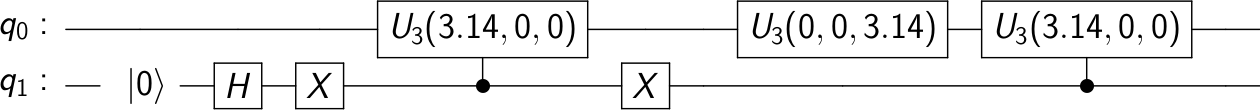

In [35]:
instance.decompose().draw(output='latex', plot_barriers=False, fold=-1, vertical_compression='medium')